In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('EV_part2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   County            3174 non-null   object
 1   City              3174 non-null   object
 2   Model Year        3174 non-null   int64 
 3   Maker             3174 non-null   object
 4   Model             3174 non-null   object
 5   EV Type           3174 non-null   object
 6   CAFV Eligibility  3174 non-null   object
 7   Electric Range    3174 non-null   int64 
 8   Electric Utility  3174 non-null   object
dtypes: int64(2), object(7)
memory usage: 223.3+ KB


In [206]:
#Encoding categoric columns
from sklearn.preprocessing import LabelEncoder

cols = ['County', 'City', 'Maker', 'Model', 'EV Type', 'CAFV Eligibility', 'Electric Utility']
for col in cols:
    LE = LabelEncoder()
    df[col] = LE.fit_transform(df[col])
    print(LE.classes_)
    print(np.sort(df[col].unique()))
    print('')

['Adams' 'Asotin' 'Columbia' 'Ferry' 'Franklin' 'Garfield' 'Island'
 'Kitsap' 'Kittitas' 'Lincoln' 'Skagit' 'Snohomish' 'Spokane' 'Stevens'
 'Thurston' 'Walla Walla' 'Whitman' 'Yakima']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]

['Addy' 'Airway Heights' 'Anacortes' 'Arlington' 'Asotin'
 'Bainbridge Island' 'Bellingham' 'Bothell' 'Bow' 'Bremerton' 'Brier'
 'Burlington' 'Centralia' 'Cheney' 'Chewelah' 'Clarkston' 'Cle Elum'
 'Clearlake' 'Clinton' 'Colbert' 'Colfax' 'College Place' 'Colton'
 'Colville' 'Concrete' 'Coupeville' 'Cowiche' 'Darrington' 'Davenport'
 'Dayton' 'Deer Meadows' 'Deer Park' 'Easton' 'Edmonds' 'Edwall'
 'Ellensburg' 'Endicott' 'Evans' 'Everett' 'Fairchild Air Force Base'
 'Fairfield' 'Ford' 'Freeland' 'Fruitland' 'Garfield' 'Gig Harbor'
 'Granite Falls' 'Greenacres' 'Greenbank' 'Hansville' 'Hatton' 'Hunters'
 'Indianola' 'Kettle Falls' 'Keyport' 'Kingston' 'Kittitas' 'La Conner'
 'Lacey' 'Lake Stevens' 'Lamont' 'Langley' 'Latah' 'Liberty Lake'
 'Lincoln

In [207]:
df

,County,City,Model Year,Maker,Model,EV Type,CAFV Eligibility,Electric Range,Electric Utility
0,11,7,2016,0,4,1,1,16,2
1,7,5,2016,0,4,1,1,16,2
2,7,9,2016,0,4,1,1,16,2
3,14,84,2016,0,4,1,1,16,2
4,14,96,2016,0,4,1,1,16,2
...,...,...,...,...,...,...,...,...,...
3169,11,134,2020,24,59,1,1,18,2
3170,14,84,2020,24,59,1,1,18,2
3171,11,33,2020,24,59,1,1,18,2
3172,6,61,2020,24,59,1,1,18,2


In [208]:
# split data
from sklearn.model_selection import train_test_split

feature = df.drop(columns=['CAFV Eligibility'])
target = df[['CAFV Eligibility']]

feature_ev1_train, feature_ev1_test, target_ev1_train, target_ev1_test = train_test_split(feature, target, test_size=0.30, random_state=42)

# convert data into numpy arrays
X_ev1_train = feature_ev1_train.to_numpy()
y_ev1_train = target_ev1_train.to_numpy().ravel()

from sklearn.tree import DecisionTreeClassifier

# define the model
dectree = DecisionTreeClassifier()

# train the model
dectree.fit(X_ev1_train, y_ev1_train)

DecisionTreeClassifier()

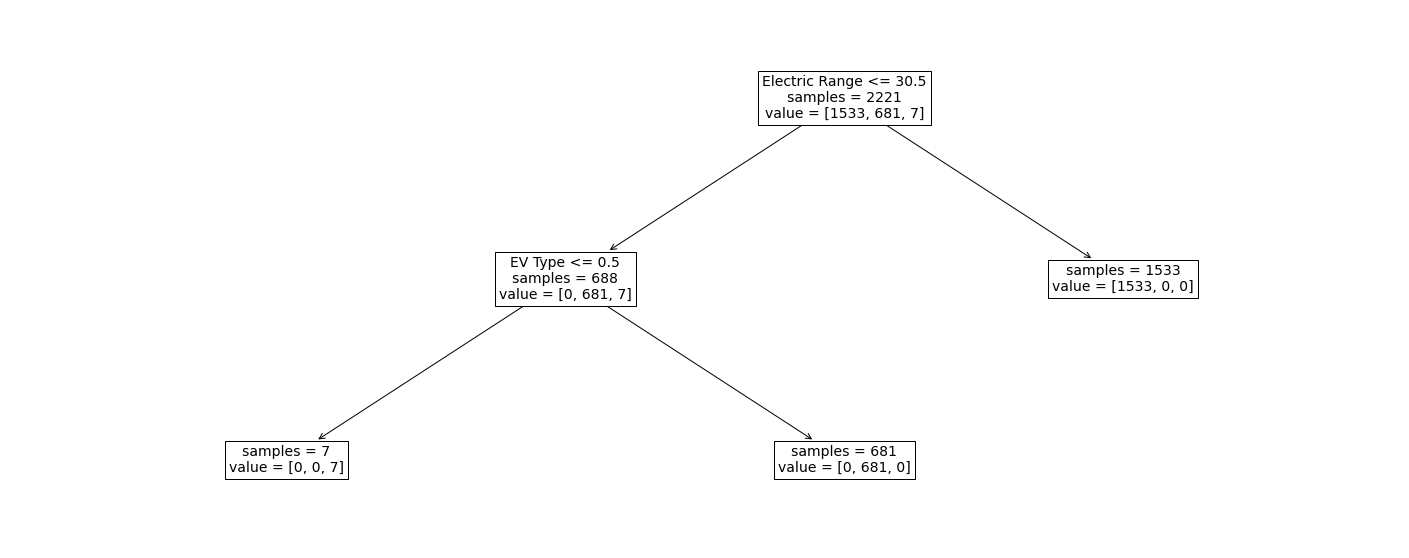

In [209]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 10))
plot_tree(
    dectree,
    feature_names=feature.columns.values,
    impurity=False,
    filled=False,
    fontsize=14
)
plt.show()

In [210]:
# accuracy score on training data
from sklearn.metrics import accuracy_score

y_predict_train = dectree.predict(X_ev1_train)

print(f"Accuracy on training data is {accuracy_score(y_ev1_train,y_predict_train)}")

Accuracy on training data is 1.0


In [211]:
# prepare test data as numpy arrays
X_ev1_test = feature_ev1_test.to_numpy()
y_ev1_test = target_ev1_test.to_numpy().ravel()

# accuracy score on test data
y_predict_test = dectree.predict(X_ev1_test)

print(f"Accuracy on test data is {accuracy_score(y_ev1_test,y_predict_test)}")

Accuracy on test data is 0.9989506820566632
